# Loading data

In [1]:
import json
tweets = [json.loads(line) for line in open('/home/class_guest/data/#Egypt.txt')]

In [2]:
len(tweets)

11940

In [3]:
tweets[0]

{'text': 'RT @bandhan1983: @ttorongo use hashtag: #Egypt #Protest and all those relating words.',
 'id_str': '30297185601986560',
 'id': 30297185601986560,
 'created_at': '水 1 26 16:13:06 +0000 2011',
 'retweeted': False,
 'retweet_count': 0,
 'favorited': False,
 'user': {'id_str': '38920576',
  'id': 38920576,
  'screen_name': 'SarrahGabriel_',
  'name': 'سارا بالأف'},
 'requested_id': 30297185601986560}

# Tokenization

In [4]:
tweets[0]['text'].split()

['RT',
 '@bandhan1983:',
 '@ttorongo',
 'use',
 'hashtag:',
 '#Egypt',
 '#Protest',
 'and',
 'all',
 'those',
 'relating',
 'words.']

In [5]:
import nltk
nltk.word_tokenize(tweets[0]['text'])

['RT',
 '@',
 'bandhan1983',
 ':',
 '@',
 'ttorongo',
 'use',
 'hashtag',
 ':',
 '#',
 'Egypt',
 '#',
 'Protest',
 'and',
 'all',
 'those',
 'relating',
 'words',
 '.']

In [6]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [7]:
tokenize(tweets[0]['text'])

['RT',
 '@',
 'bandhan1983',
 ':',
 '@',
 'ttorongo',
 'use',
 'hashtag',
 ':',
 '#',
 'Egypt',
 '#',
 'Protest',
 'and',
 'all',
 'those',
 'relating',
 'words',
 '.']

# Counting Words

An object of collections.Counter computes and preseves frequency of elements in a given collection.

In [8]:
from collections import Counter
counter = Counter()
for t in tweets:
    counter.update(tokenize(t['text']))
    
counter.most_common(30)

[('#', 25873),
 ('Egypt', 12708),
 (':', 10507),
 ('.', 7817),
 ('@', 5930),
 (',', 5196),
 ('in', 4885),
 ('the', 4632),
 ('http', 4466),
 ('to', 4288),
 ('Jan25', 4068),
 ('of', 3409),
 ('RT', 2832),
 ('!', 2189),
 ('is', 2184),
 ('and', 2018),
 ('Mubarak', 2002),
 ('on', 1960),
 ("'s", 1958),
 ('jan25', 1820),
 ('a', 1762),
 ('for', 1600),
 ('Tahrir', 1355),
 ('?', 1345),
 ('``', 1289),
 ("''", 1282),
 ('Cairo', 1210),
 ('from', 1196),
 ('are', 1192),
 ('I', 1092)]

### Word filtering by regular expression

`re` library contains functions for processing related with regular expression.

The regular expression `[a-zA-Z]+` matches with a string that contains only alphabet.

In [9]:
import re
counter = Counter()
for t in tweets:
    counter.update([w for w in tokenize(t['text']) if re.match('\w+', w)])

counter.most_common(30)

[('Egypt', 12708),
 ('in', 4885),
 ('the', 4632),
 ('http', 4466),
 ('to', 4288),
 ('Jan25', 4068),
 ('of', 3409),
 ('RT', 2832),
 ('is', 2184),
 ('and', 2018),
 ('Mubarak', 2002),
 ('on', 1960),
 ('jan25', 1820),
 ('a', 1762),
 ('for', 1600),
 ('Tahrir', 1355),
 ('Cairo', 1210),
 ('from', 1196),
 ('are', 1192),
 ('I', 1092),
 ('that', 911),
 ('people', 859),
 ('Egyptian', 821),
 ('it', 808),
 ('not', 806),
 ('with', 782),
 ('be', 778),
 ('by', 746),
 ('The', 733),
 ('will', 721)]

### Filtering stop words
A list of words that seem not to be relevant to a topic of document, which is enumerated by someone without any theoretical evidence.

In [10]:
from nltk.corpus import stopwords
stopwords.words('english')
sws = set(stopwords.words('english'))
print(sws)

{"you'd", 'an', 'myself', 'too', 'our', 'having', 'haven', 'did', 'his', 'mightn', "don't", 'whom', 'be', 'doing', 'just', 'again', 'don', 'she', "shan't", 'further', 'ours', 'each', 'we', 'here', 'should', 'until', "you've", 'once', 'out', 'hadn', 'themselves', 'if', 'what', "hadn't", "you're", 'but', 'under', 'wouldn', 'do', 'you', 'it', 'and', 'off', "she's", 'he', "mustn't", "should've", "it's", 'doesn', 'my', 'yourselves', 'itself', 'against', 'down', 'before', 'at', 'on', 'any', 'hasn', 'with', 've', 'while', 'ma', "weren't", 'only', 'same', 'll', 'them', 'own', 'him', 'being', 'yourself', "didn't", 'those', 'by', 'o', 'me', 'her', 'of', 'm', 'i', 'this', 'other', 'over', "you'll", "needn't", 'is', 'does', 'its', 'to', 'above', "wasn't", 'how', 'ain', "isn't", 'between', 'for', "aren't", 'because', 'where', 'hers', 'herself', 'have', 'nor', 'shan', 'after', 'why', 'they', 'which', 'needn', 'shouldn', "that'll", 'has', 'there', 'aren', 'isn', 'when', 'both', 'during', 'all', 'were

In [11]:
counter = Counter()
for t in tweets:
    counter.update([w for w in tokenize(t['text'])
                    if re.match('\w+', w) and not w.lower() in sws])
    
counter.most_common(30)

[('Egypt', 12708),
 ('http', 4466),
 ('Jan25', 4068),
 ('RT', 2832),
 ('Mubarak', 2002),
 ('jan25', 1820),
 ('Tahrir', 1355),
 ('Cairo', 1210),
 ('people', 859),
 ('Egyptian', 821),
 ("n't", 580),
 ('Al', 576),
 ('protesters', 517),
 ('protests', 492),
 ('Jazeera', 491),
 ('via', 487),
 ('Square', 422),
 ('US', 414),
 ('police', 387),
 ('says', 344),
 ('today', 329),
 ('army', 320),
 ('Obama', 310),
 ('2', 290),
 ('live', 286),
 ('TV', 281),
 ('government', 278),
 ('revolution', 259),
 ('Egyptians', 251),
 ('Twitter', 243)]

### Stemming

In [12]:
counter['protester']

44

In [13]:
counter['protesters']

517

#### Porter Stemmer

Algorithmic approach that is based on a heuristics

- step1 gets rid of plurals and -ed or –ing
- step2 maps double suffices to single ones. So -ization ( = -ize plus -ation) maps to -ize etc.
- step3 deletes with -ic-, -full, -ness etc.
- step4 takes off -ant, -ence etc.
- step5 removes a final -e, and changes -ll to –l

In [14]:
test_raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
test_tokens = nltk.word_tokenize(test_raw)

In [15]:
porter = nltk.PorterStemmer()
stemmed = [porter.stem(w) for w in test_tokens]
print(stemmed)

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


#### Lancaster Stemmer (Paice/Husk Stemmer)
Fully rule-based approach that uses the externally stored rules. For example, the rules include:

- -ied > -y
- -ceed > -cess
- -eed > -ee
- -ed > -
- -hood > -
- -e > -
- -lief > -liev
- -if > -
- -ing > -
- -iag > -y

In [16]:
lancaster = nltk.LancasterStemmer()
stemmed = [lancaster.stem(w) for w in test_tokens]
print(stemmed)

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


### Lemmatization
#### WordNet Lemmatizer
A lemmatizer that uses WordNet as a reference dictionary. WordNet is a dictionary that contains information about semantic relationship between words, so that you can use it as a thesaurus.

In [17]:
wnl = nltk.WordNetLemmatizer()
lemmas = [wnl.lemmatize(w) for w in test_tokens]
print(lemmas)

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


In [18]:
counter = Counter()
for t in tweets:
    counter.update([wnl.lemmatize(w.lower()) for w in tokenize(t['text'])
                    if re.match('\w+', w) and not w.lower() in sws])
    
counter.most_common(30)

[('egypt', 12790),
 ('jan25', 5908),
 ('http', 4474),
 ('rt', 2853),
 ('mubarak', 2123),
 ('tahrir', 1526),
 ('cairo', 1305),
 ('egyptian', 1106),
 ('people', 1043),
 ('protest', 865),
 ('u', 809),
 ('protester', 736),
 ('square', 643),
 ('al', 593),
 ("n't", 587),
 ('say', 532),
 ('jazeera', 522),
 ('via', 517),
 ('police', 512),
 ('army', 476),
 ('live', 463),
 ('internet', 442),
 ('report', 426),
 ('revolution', 422),
 ('today', 412),
 ('news', 381),
 ('government', 373),
 ('twitter', 334),
 ('please', 314),
 ('obama', 313)]

In [19]:
counter['protester']

736

In [20]:
counter['protesters']

0

### Part-of-speech (POS) filtering

NLTK includes a function that estimates the POS of each word. By using this function, we can make a word counter that limits words by its POS.

In [21]:
nltk.pos_tag(test_tokens)

[('DENNIS', 'NN'),
 (':', ':'),
 ('Listen', 'NNP'),
 (',', ','),
 ('strange', 'JJ'),
 ('women', 'NNS'),
 ('lying', 'VBG'),
 ('in', 'IN'),
 ('ponds', 'NNS'),
 ('distributing', 'VBG'),
 ('swords', 'NNS'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('basis', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('system', 'NN'),
 ('of', 'IN'),
 ('government', 'NN'),
 ('.', '.'),
 ('Supreme', 'NNP'),
 ('executive', 'NN'),
 ('power', 'NN'),
 ('derives', 'VBZ'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('mandate', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('masses', 'NNS'),
 (',', ','),
 ('not', 'RB'),
 ('from', 'IN'),
 ('some', 'DT'),
 ('farcical', 'JJ'),
 ('aquatic', 'JJ'),
 ('ceremony', 'NN'),
 ('.', '.')]

In [22]:
counter = Counter()
for t in tweets:
    counter.update([wnl.lemmatize(w.lower()) for w, pos in nltk.pos_tag(tokenize(t['text']))
                    if re.match('\w+', w) and not w.lower() in sws and pos in {'NN', 'NNS', 'NNP', 'NNPS'}])
    
counter.most_common(30)

[('egypt', 12707),
 ('jan25', 5683),
 ('http', 4338),
 ('rt', 2843),
 ('mubarak', 2074),
 ('tahrir', 1464),
 ('cairo', 1279),
 ('people', 1042),
 ('protest', 767),
 ('protester', 734),
 ('square', 603),
 ('al', 588),
 ('jazeera', 522),
 ('police', 487),
 ('army', 442),
 ('revolution', 420),
 ('u', 412),
 ('internet', 411),
 ('today', 406),
 ('news', 380),
 ('government', 373),
 ('report', 364),
 ('egyptian', 355),
 ('twitter', 314),
 ('obama', 310),
 ('street', 303),
 ('tv', 299),
 ('state', 296),
 ('video', 291),
 ('journalist', 289)]

### Visualize word count by word cloud

Word cloud is one of the popular ways to visualize word frequencies. There is a `wordcloud` library that easily makes a  word cloud. See https://github.com/amueller/word_cloud for detail.

(-0.5, 399.5, 199.5, -0.5)

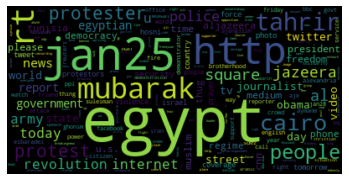

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(counter)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Counting n-grams

`nltk.ngrams(tokens, n)` returns a generator of `n`-grams that can be yielded from the given `tokens`. Each n-gram is represented as a tuple with `n` elements. We can count them simply by giving them to `collections.Counter`.

In [24]:
list(nltk.ngrams(test_tokens, 2))

[('DENNIS', ':'),
 (':', 'Listen'),
 ('Listen', ','),
 (',', 'strange'),
 ('strange', 'women'),
 ('women', 'lying'),
 ('lying', 'in'),
 ('in', 'ponds'),
 ('ponds', 'distributing'),
 ('distributing', 'swords'),
 ('swords', 'is'),
 ('is', 'no'),
 ('no', 'basis'),
 ('basis', 'for'),
 ('for', 'a'),
 ('a', 'system'),
 ('system', 'of'),
 ('of', 'government'),
 ('government', '.'),
 ('.', 'Supreme'),
 ('Supreme', 'executive'),
 ('executive', 'power'),
 ('power', 'derives'),
 ('derives', 'from'),
 ('from', 'a'),
 ('a', 'mandate'),
 ('mandate', 'from'),
 ('from', 'the'),
 ('the', 'masses'),
 ('masses', ','),
 (',', 'not'),
 ('not', 'from'),
 ('from', 'some'),
 ('some', 'farcical'),
 ('farcical', 'aquatic'),
 ('aquatic', 'ceremony'),
 ('ceremony', '.')]

In [25]:
counter = Counter()
for t in tweets:
    counter.update([ng for ng in nltk.ngrams(tokenize(t['text']), 2)])
    
counter.most_common(30)

[(('#', 'Egypt'), 11979),
 (('http', ':'), 4466),
 (('#', 'Jan25'), 4053),
 (('Egypt', '#'), 3249),
 (('RT', '@'), 2535),
 (('.', '#'), 2229),
 (('in', '#'), 2016),
 (('#', 'jan25'), 1817),
 (('Jan25', '#'), 1774),
 (('#', 'Mubarak'), 805),
 ((':', 'http'), 764),
 (('jan25', '#'), 689),
 (('#', 'Tahrir'), 623),
 (('!', '#'), 604),
 (('Egypt', '.'), 562),
 (('.', 'http'), 516),
 (('of', '#'), 514),
 ((':', '#'), 501),
 (('#', 'Cairo'), 483),
 (('Al', 'Jazeera'), 467),
 (('Egypt', ':'), 443),
 (('of', 'the'), 419),
 (('!', '!'), 407),
 (('Tahrir', 'Square'), 382),
 (('via', '@'), 365),
 (('Egypt', 'http'), 364),
 (('in', 'the'), 359),
 (('Egypt', ','), 350),
 (('on', '#'), 335),
 (('Egypt', "'s"), 331)]

### Filtering words before making n-grams

The easiest way to filter uninterest n-grams is to apply word filtering to the token list before constructing n-grams. It causes some problems but works to observe some interesting phrases. (Think about what kind of issues are there in this process.)

In [26]:
def preprocess(text):
    return [wnl.lemmatize(w.lower()) for w in tokenize(text)
                    if re.match('\w+', w) and not w.lower() in sws]

In [27]:
counter = Counter()
for t in tweets:
    counter.update([ng for ng in nltk.ngrams(preprocess(t['text']), 2)])
    
counter.most_common(30)

[(('egypt', 'jan25'), 2323),
 (('jan25', 'egypt'), 1644),
 (('http', 'egypt'), 838),
 (('http', 'jan25'), 769),
 (('egypt', 'http'), 612),
 (('tahrir', 'square'), 532),
 (('al', 'jazeera'), 489),
 (('people', 'egypt'), 194),
 (('egypt', 'protest'), 189),
 (('egypt', 'mubarak'), 185),
 (('cairo', 'egypt'), 185),
 (('http', 'via'), 164),
 (('jan25', 'http'), 161),
 (('egypt', 'tahrir'), 134),
 (('hosni', 'mubarak'), 134),
 (('tahrir', 'egypt'), 133),
 (('jan25', 'tahrir'), 133),
 (('mubarak', 'egypt'), 133),
 (('state', 'tv'), 125),
 (('muslim', 'brotherhood'), 121),
 (('egypt', 'cairo'), 117),
 (('protest', 'egypt'), 116),
 (('tahrir', 'sq'), 111),
 (('tahrir', 'jan25'), 105),
 (('ca', "n't"), 104),
 (('egypt', 'army'), 101),
 (('wo', "n't"), 97),
 (('protest', 'http'), 97),
 (('jan25', 'mubarak'), 93),
 (('mubarak', 'jan25'), 91)]

# Phrase detection

`Phrases` class in `gensim` library is an implementation of statistical detection of phrases based on point-wise mutual information. See https://radimrehurek.com/gensim/models/phrases.html for detail.

In [28]:
from gensim.models.phrases import Phrases
phrases = Phrases([preprocess(t['text']) for t in tweets], min_count=1, threshold=1)

In [29]:
phrases[preprocess(tweets[442]['text'])]

['back', 'al_jazeera', 'english', 'discus_egypt', 'watch_http', 'jan25_egypt']

In [30]:
counter = Counter()
for t in tweets:
    counter.update([p for p in phrases[preprocess(t['text'])]])
    
counter.most_common(30)

[('egypt', 5689),
 ('http', 1850),
 ('egypt_jan25', 1723),
 ('jan25', 1708),
 ('jan25_egypt', 1325),
 ('rt', 1060),
 ('mubarak', 871),
 ('http_egypt', 616),
 ('http_jan25', 541),
 ('cairo', 533),
 ('tahrir', 496),
 ('al_jazeera', 386),
 ('tahrir_square', 306),
 ('u', 290),
 ('protest', 276),
 ('people', 263),
 ('egyptian', 252),
 ('protester', 232),
 ('revolution', 214),
 ('say', 196),
 ('today', 186),
 ('police', 162),
 ('egypt_protest', 146),
 ('via', 144),
 ('2', 138),
 ('news', 137),
 ('square', 136),
 ('people_egypt', 135),
 ('right', 128),
 ('report', 126)]

(-0.5, 399.5, 199.5, -0.5)

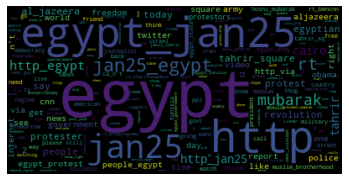

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(counter)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")